# Personality Prediction

In [57]:
# Filtering all warnings
import warnings
warnings.filterwarnings('ignore')

In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score




In [59]:
# Loading Dataset
df = pd.read_csv('datasets/personality.csv')
df.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,3.0,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


## Gathering Basic Information About Data

In [60]:
# Checking for missing values 
df.isnull().mean()

Time_spent_Alone             0.0
Stage_fear                   0.0
Social_event_attendance      0.0
Going_outside                0.0
Drained_after_socializing    0.0
Friends_circle_size          0.0
Post_frequency               0.0
Personality                  0.0
dtype: float64

In [61]:
# Info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [62]:
# Extracting column names
np.array(df.columns.to_list())

array(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing',
       'Friends_circle_size', 'Post_frequency', 'Personality'],
      dtype='<U25')

In [63]:
# Checking Count of Unique Values In target 
df['Personality'].value_counts()

Extrovert    1491
Introvert    1409
Name: Personality, dtype: int64

## Defining features types

In [64]:
numeric_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
categorical_features = ['Stage_fear', 'Drained_after_socializing']

target_feature = 'Personality'

# Verify categorical values
for col in categorical_features:
    print(f'\nUnique values on {col}:')
    print(df[col].value_counts())



Unique values on Stage_fear:
No     1490
Yes    1410
Name: Stage_fear, dtype: int64

Unique values on Drained_after_socializing:
No     1493
Yes    1407
Name: Drained_after_socializing, dtype: int64


## Data Visualization

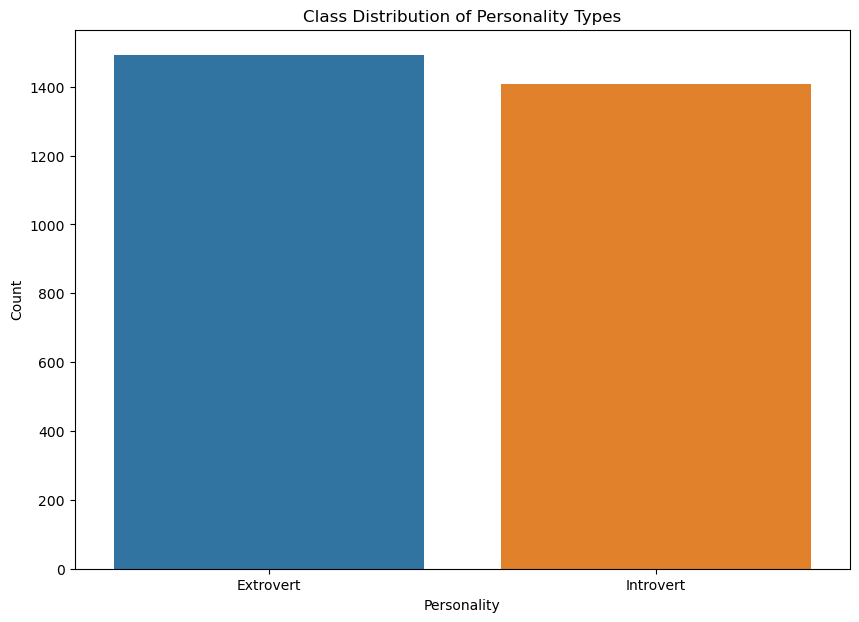

In [65]:
# Class distribution
plt.figure(figsize=(10, 7))
sns.countplot(x=target_feature, data=df)
plt.title('Class Distribution of Personality Types')
plt.xlabel('Personality')
plt.ylabel('Count')
plt.show()

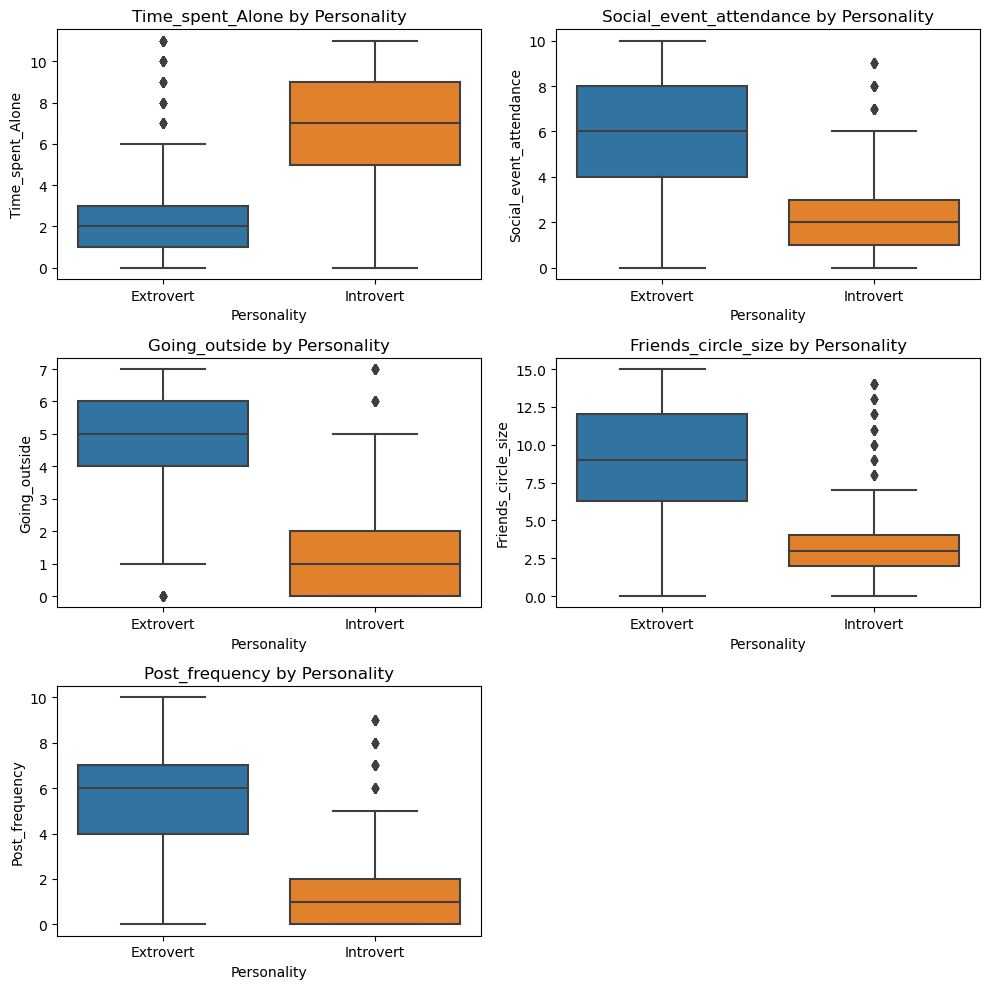

In [66]:
# Numeric feature distributions by class¶
plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
sns.boxplot(x=target_feature , y = df['Time_spent_Alone'] , data = df)
plt.title('Time_spent_Alone by Personality')

plt.subplot(3,2,2)
sns.boxplot(x=target_feature , y = df['Social_event_attendance'], data = df)
plt.title('Social_event_attendance by Personality')

plt.subplot(3,2,3)
sns.boxplot(x=target_feature , y = df['Going_outside'], data = df)
plt.title('Going_outside by Personality')

plt.subplot(3,2,4)
sns.boxplot(x=target_feature , y = df['Friends_circle_size'], data = df)
plt.title('Friends_circle_size by Personality')

plt.subplot(3,2,5)
sns.boxplot(x=target_feature , y = df['Post_frequency'], data = df)
plt.title('Post_frequency by Personality')

plt.tight_layout()

plt.show()


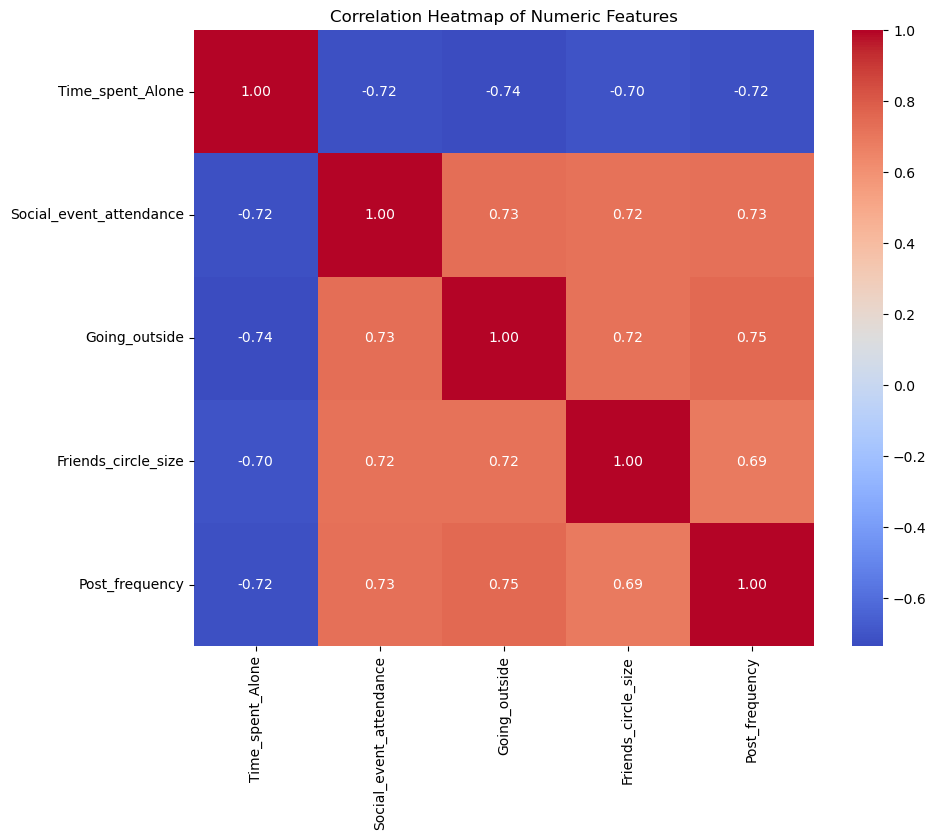

In [67]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## Predicting Human Personality

In [68]:
# 1. Splitting the data into Training and Testing set
X = df[numeric_features + categorical_features]
y = df['Personality']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2320, 7), (580, 7), (2320,), (580,))

In [71]:
#2. Preprocess the dataset
# Filling Numerical Values with the help of KNNImputer and Scaling it with StandardScalar
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])


In [72]:
# Filling Numerical Values with the help of SimpleImputer and encoding it with OrdinalEncoder
categorical_transformer = Pipeline([
    ('encoder', OrdinalEncoder())
])


In [73]:
# Passing Numerical and Categorical transformation into ColumnTransformer to complete Preprocessing step¶
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


In [74]:
# 3. Making pipeline for preprocessing and model building
dtc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42)) 
])

# Training the model
dtc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Time_spent_Alone',
                                                   'Social_event_attendance',
                                                   'Going_outside',
                                                   'Friends_circle_size',
                                                   'Post_frequency']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Stage_fear',
                                                   'Drained_after_socializing'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [87]:
dtc_y_pred = dtc_pipeline.predict(X_test)

In [88]:
difference = np.sum(dtc_y_pred != y_test)
difference

41

In [89]:
print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)


Test Accuracy: 92.93103448275862


In [97]:
rfc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rfc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Time_spent_Alone',
                                                   'Social_event_attendance',
                                                   'Going_outside',
                                                   'Friends_circle_size',
                                                   'Post_frequency']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Stage_fear',
                                                   'Drained_after_socializing'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [98]:
rfc_y_pred = rfc_pipeline.predict(X_test)

In [99]:
difference = np.sum(rfc_y_pred != y_test)
difference

45

In [100]:
print("Test Accuracy:", accuracy_score(y_test, rfc_y_pred) * 100)


Test Accuracy: 92.24137931034483


Random forest result differ not significantly with decision tree

## For New User Input

In [101]:
class PersonalityPredictor:
    def __init__(self, pipeline, numeric_features, categorical_features):
        self.pipeline = pipeline
        self.features = numeric_features + categorical_features

    def predict(self, X):
        if isinstance(X, dict):
            X = pd.DataFrame([X])

        # Ensure column order and presence
        X = X[self.features]
        prediction = self.pipeline.predict(X)
        return prediction[0]

In [103]:
predictor = PersonalityPredictor(
    pipeline=clf_pipeline,
    numeric_features=['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency'],
    categorical_features=['Stage_fear', 'Drained_after_socializing']
)

# New input to classify
new_person = {
    'Time_spent_Alone': float(input("\nPlease enter how many hours you spent alone in a day : ")),
    'Social_event_attendance': int(input("\nHow many social events you have attended : ")),
    'Going_outside':float(input("\nHow many hours you spent outside a day : ")),
    'Friends_circle_size': int(input("\nHow big is your Friend Circle : ")),
    'Post_frequency': int(input("\nTell me about your post frequncy : ")),
    'Stage_fear': (input("\nDo you have any stage fear ? (Yes/No): ")),
    'Drained_after_socializing': (input("\nDo you feel exhausted after socialising? (Yes/No) : "))
}

# Make prediction
result = predictor.predict(new_person)
print("\n\nPredicted Personality:", result)



Predicted Personality: Introvert
